<a href="https://colab.research.google.com/github/sa96102/Python_exam/blob/master/CT_Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Finding and Measuring Lungs in CT Data (kaggle)
(https://www.kaggle.com/kmader/finding-lungs-in-ct-data)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 1.x
import tensorflow
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D
from keras.models import Model, load_model
from keras.callbacks import ReduceLROnPlateau

TensorFlow 1.x selected.


Using TensorFlow backend.


### Load Dataset

In [3]:
x_train = np.load('/content/drive/My Drive/Colab Notebooks/Python_exam/Data/CT_Image_segmentation/x_train.npy')
y_train = np.load('/content/drive/My Drive/Colab Notebooks/Python_exam/Data/CT_Image_segmentation/y_train.npy')
x_val = np.load('/content/drive/My Drive/Colab Notebooks/Python_exam/Data/CT_Image_segmentation/x_val.npy')
y_val = np.load('/content/drive/My Drive/Colab Notebooks/Python_exam/Data/CT_Image_segmentation/y_val.npy')

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)


### Build Model

In [4]:
inputs = Input(shape=(256, 256, 1))

net = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(64, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(128, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Dense(128, activation='relu')(net) # 좀 더 나은 학습을 위해 Dense layer 추가.

net = UpSampling2D(size=2)(net)
net = Conv2D(128, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(64, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
outputs = Conv2D(1, kernel_size=3, activation='sigmoid', padding='same')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'mse'])

model.summary()








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
________________________

### Training

In [5]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), 
epochs=100, batch_size=32, callbacks=[
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1, 
mode='auto', min_lr=1e-05)
])




Train on 240 samples, validate on 27 samples
Epoch 1/100





240/240 [==============================] - 15s 64ms/step - loss: 0.6555 - acc: 0.6944 - mean_squared_error: 0.2182 - val_loss: 0.5344 - val_acc: 0.7467 - val_mean_squared_error: 0.1773
Epoch 2/100
240/240 [==============================] - 1s 4ms/step - loss: 0.5129 - acc: 0.7595 - mean_squared_error: 0.1674 - val_loss: 0.4884 - val_acc: 0.7467 - val_mean_squared_error: 0.1617
Epoch 3/100
240/240 [==============================] - 1s 4ms/step - loss: 0.4709 - acc: 0.7627 - mean_squared_error: 0.1565 - val_loss: 0.4478 - val_acc: 0.7467 - val_mean_squared_error: 0.1500
Epoch 4/100
240/240 [==============================] - 1s 4ms/step - loss: 0.4318 - acc: 0.7648 - mean_squared_error: 0.1422 - val_loss: 0.4233 - val_acc: 0.7471 - val_mean_squared_error: 0.1385
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 0.4254 - acc: 0.7734 - mean_squared_error: 0.1395 - val_loss: 0.5303 - val_acc: 0.7467 - v

### Evaluation

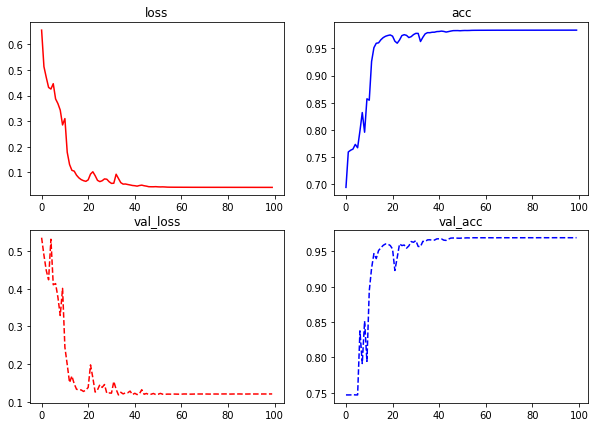

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].set_title('loss')
ax[0, 0].plot(history.history['loss'], 'r')
ax[0, 1].set_title('acc')
ax[0, 1].plot(history.history['acc'], 'b')

ax[1, 0].set_title('val_loss')
ax[1, 0].plot(history.history['val_loss'], 'r--')
ax[1, 1].set_title('val_acc')
ax[1, 1].plot(history.history['val_acc'], 'b--')

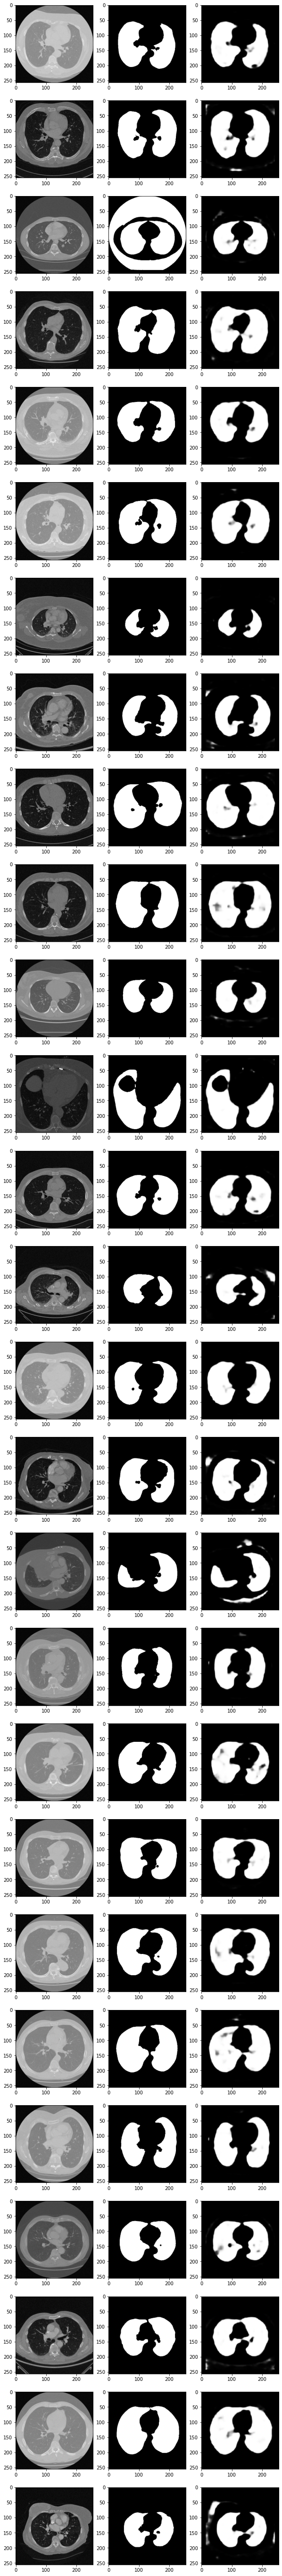

In [7]:
preds = model.predict(x_val) # 테스트 데이터 예측.

fig,ax = plt.subplots(len(x_val), 3, figsize=(10, 100))

for i, pred in enumerate(preds):
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')